In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

In [3]:
file_path = r'C:\Users\kishv\OneDrive\Desktop\flights-sagemaker-projects\Data\train.csv'

train = pd.read_csv(file_path)

In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train['date_of_journey'] = pd.to_datetime(train['date_of_journey'])
train['dep_time'] = pd.to_datetime(train['dep_time']) 
train['arrival_time'] = pd.to_datetime(train['arrival_time']) 
train['total_stops'] = train['total_stops'].astype(object)

C:\Users\kishv\AppData\Local\Temp\ipykernel_11508\2097766754.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['dep_time'] = pd.to_datetime(train['dep_time'])
C:\Users\kishv\AppData\Local\Temp\ipykernel_11508\2097766754.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['arrival_time'] = pd.to_datetime(train['arrival_time'])


### High Level analysis

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    object        
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 50.1+ KB


In [7]:
train.describe(include='number')

,duration,price
count,640.000000,640.000000
mean,628.148438,9046.931250
std,494.461391,4753.955625
min,75.000000,1965.000000
25%,170.000000,5201.000000
50%,500.000000,8052.000000
75%,911.250000,11842.750000
max,2525.000000,52285.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    object        
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 50.1+ KB


In [9]:
train.describe(include="O")

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,233,281,281,336.0,478


### High Level analysis of missing values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


<Axes: >

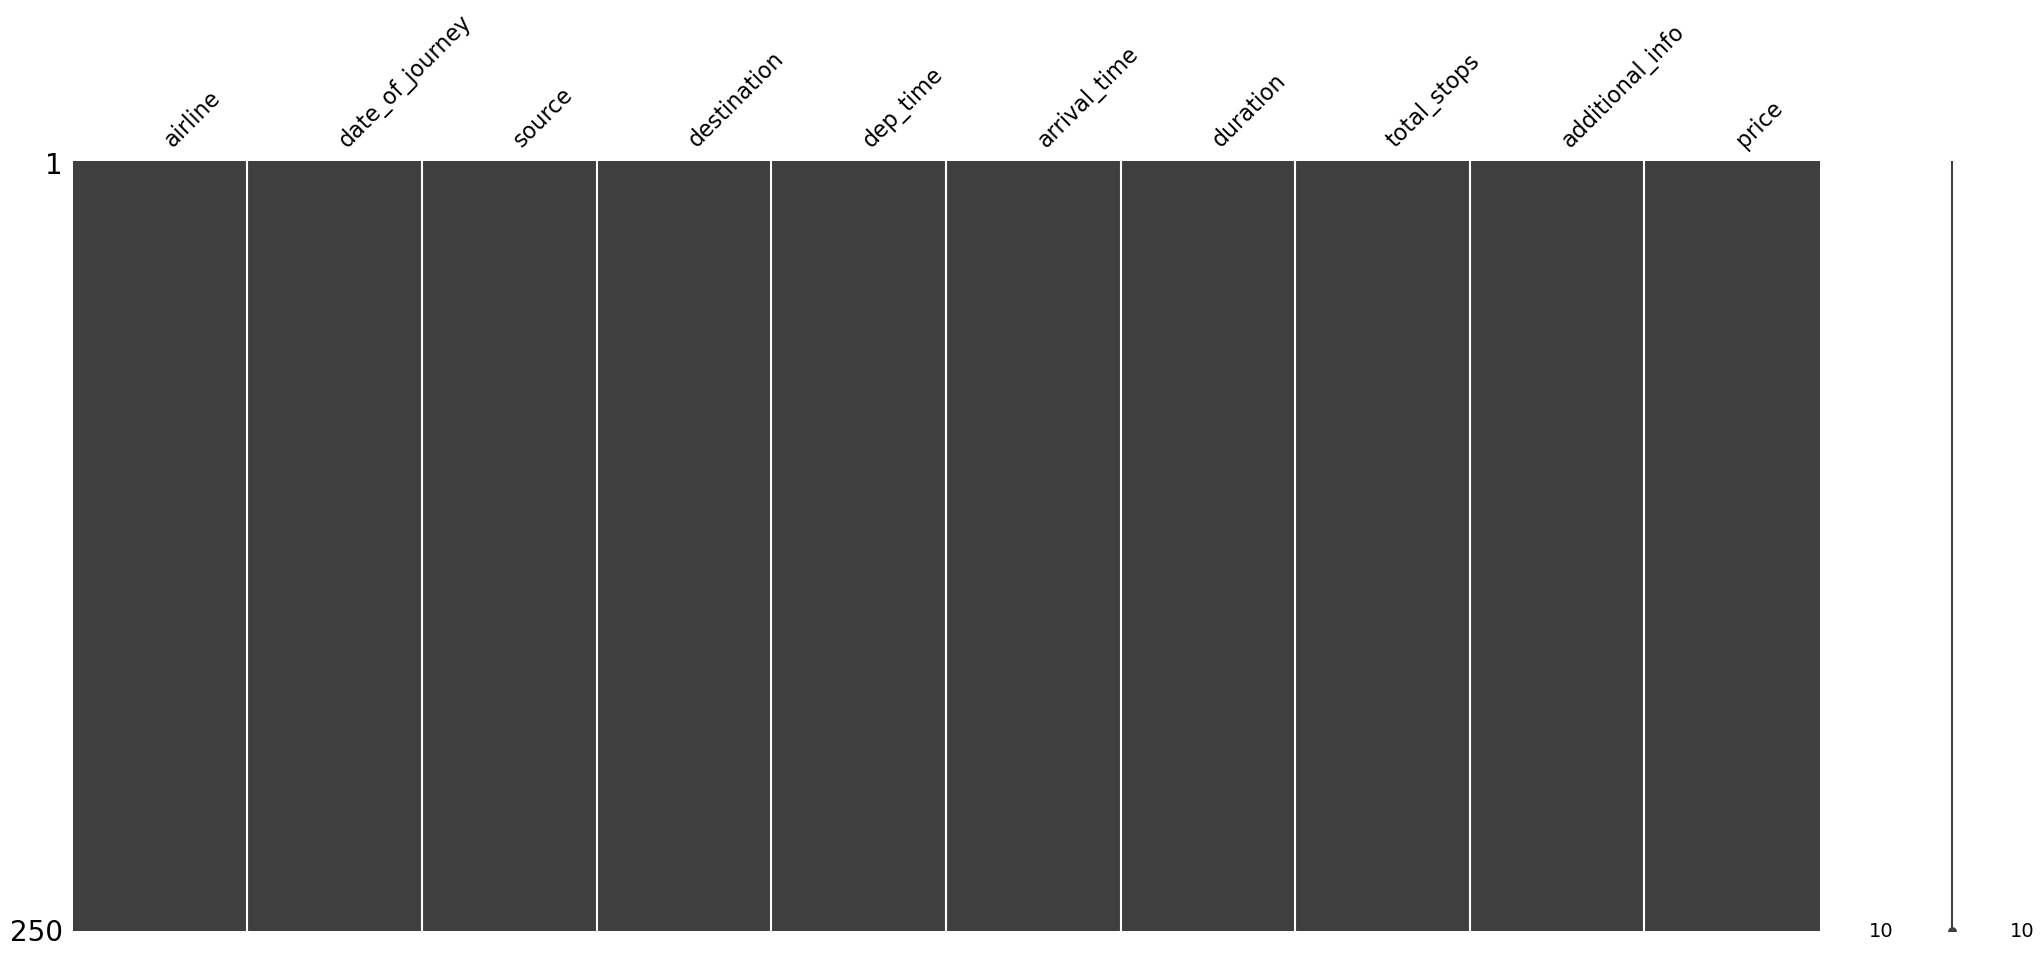

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(train.sample(250))

C:\Users\kishv\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\kishv\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

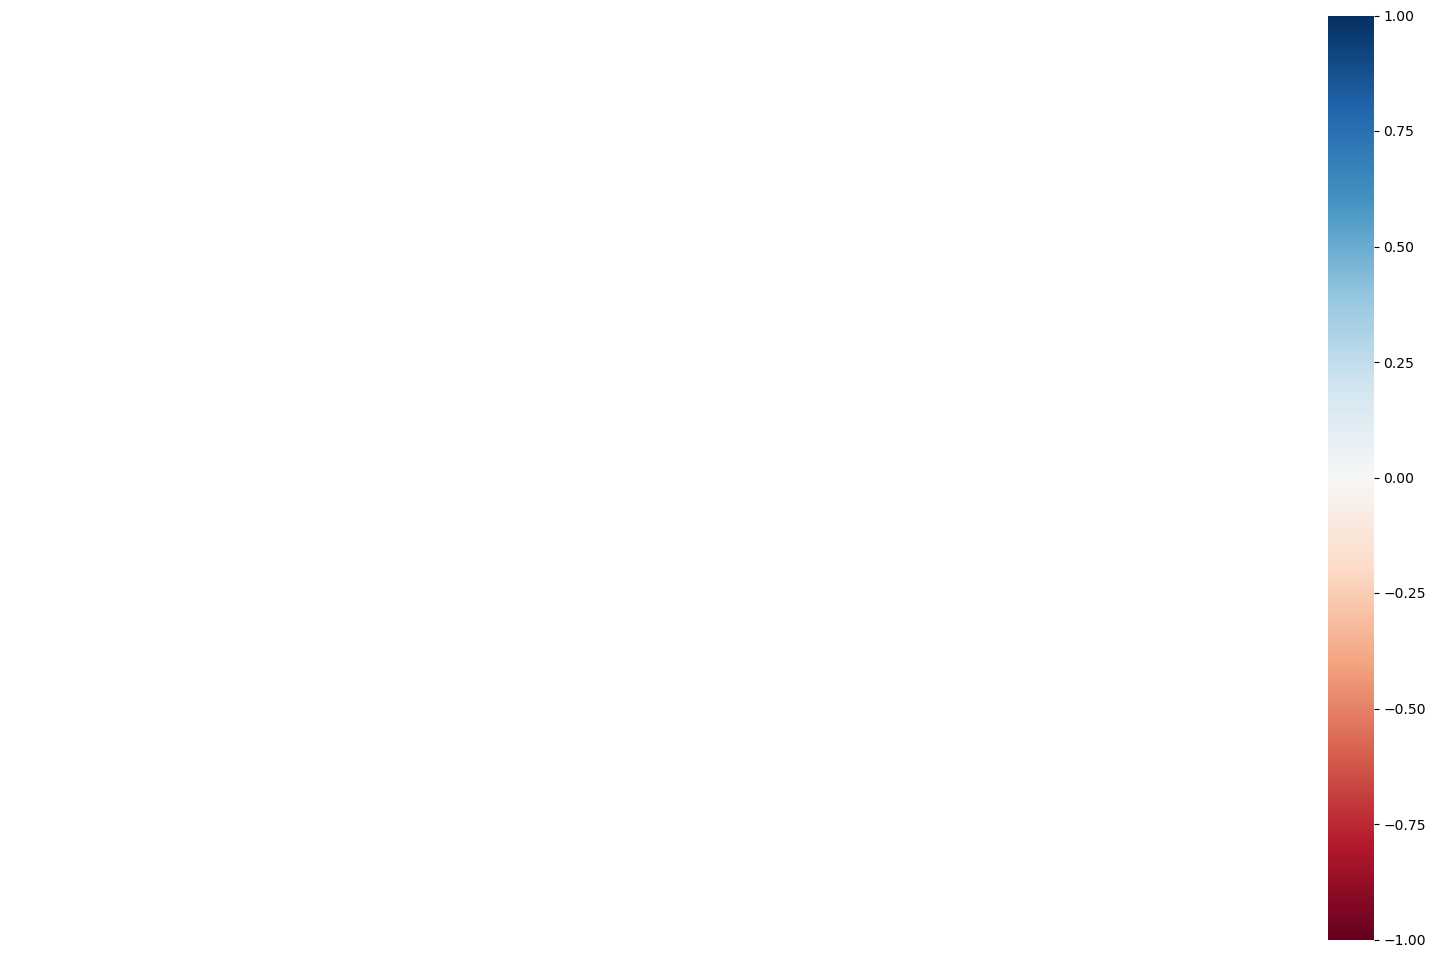

In [12]:
msno.heatmap(train)

### Isolation Forest

In [13]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [14]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns='price')
                                       .select_dtypes(include='number')))
    .query('outlier == -1')
    .duration
    .describe()

)

count     300.000000
mean      884.183333
std       568.362004
min        75.000000
25%       285.000000
50%       925.000000
75%      1355.000000
max      2525.000000
Name: duration, dtype: float64

### Pair Plots

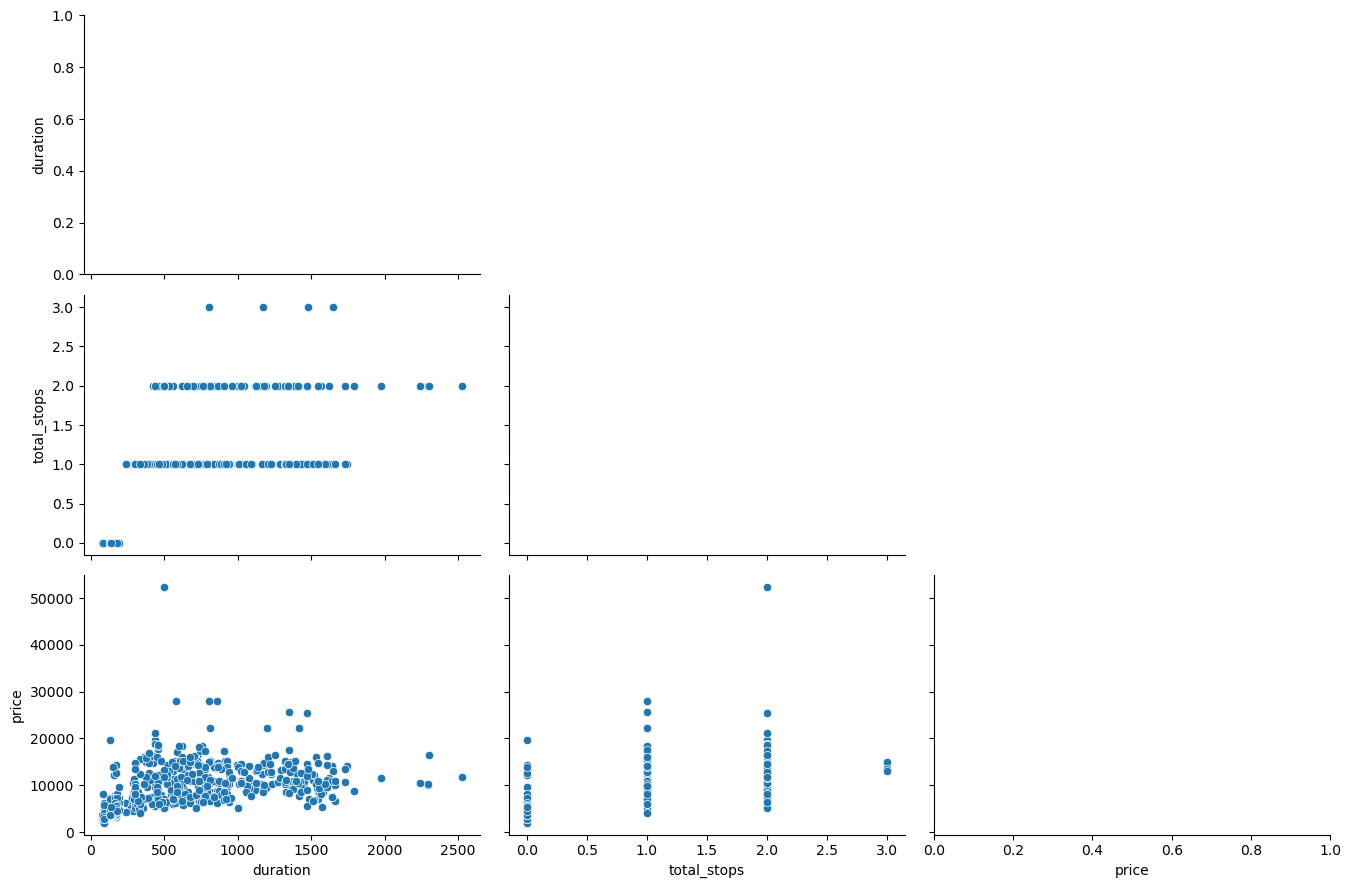

In [15]:
eda_helper_functions.pair_plots(train)

In [16]:
train['total_stops'] = train['total_stops'].astype(float)

### Correlation Analysis

C:\Users\kishv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


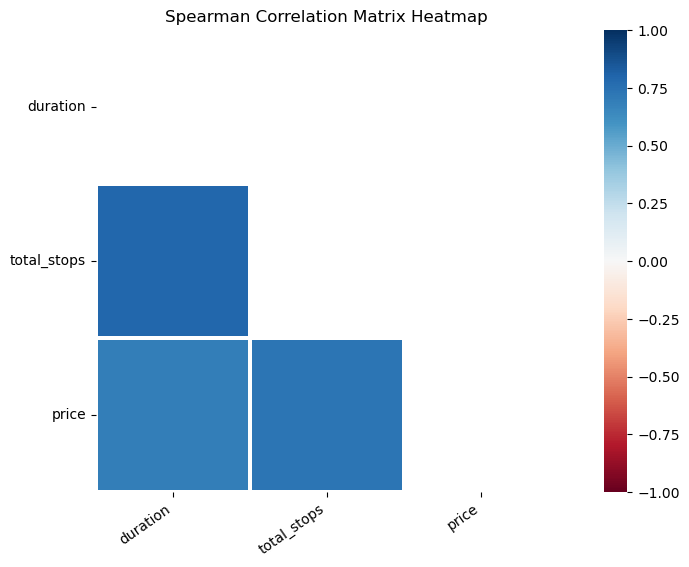

In [17]:
eda_helper_functions.correlation_heatmap(train)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [19]:
train.corr(method='spearman',numeric_only = True)

,duration,total_stops,price
duration,1.000000,0.795471,0.692721
total_stops,0.795471,1.000000,0.728615
price,0.692721,0.728615,1.000000


C:\Users\kishv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


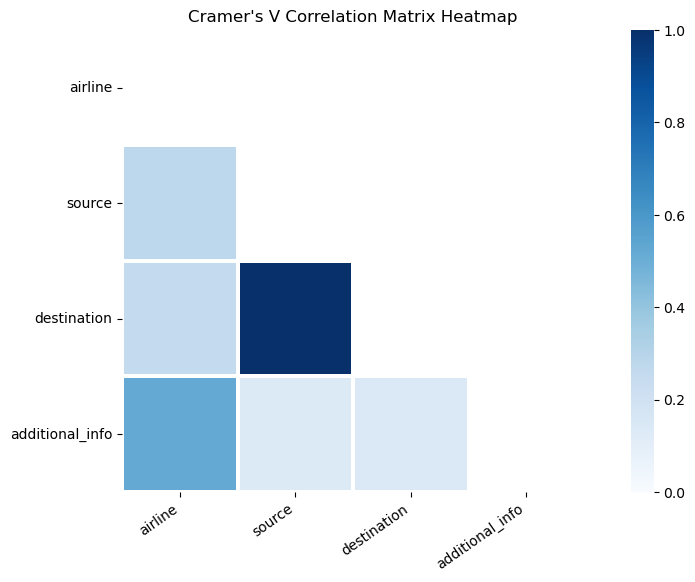

In [20]:
eda_helper_functions.cramersV_heatmap(train)

### 8.) Detailed Analysis

In [21]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1.) Airline

In [22]:
train.airline

0           Indigo
1           Indigo
2         Spicejet
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636       Spicejet
637      Air India
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [23]:
eda_helper_functions.cat_summary(train, "airline")

0           Indigo
1           Indigo
2         Spicejet
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636       Spicejet
637      Air India
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,233


,count,percentage
category,,
Jet Airways,233,0.364063
Indigo,127,0.198437
Air India,90,0.140625
Multiple Carriers,82,0.128125
Spicejet,54,0.084375
Vistara,28,0.043750
Air Asia,18,0.028125
Goair,8,0.012500


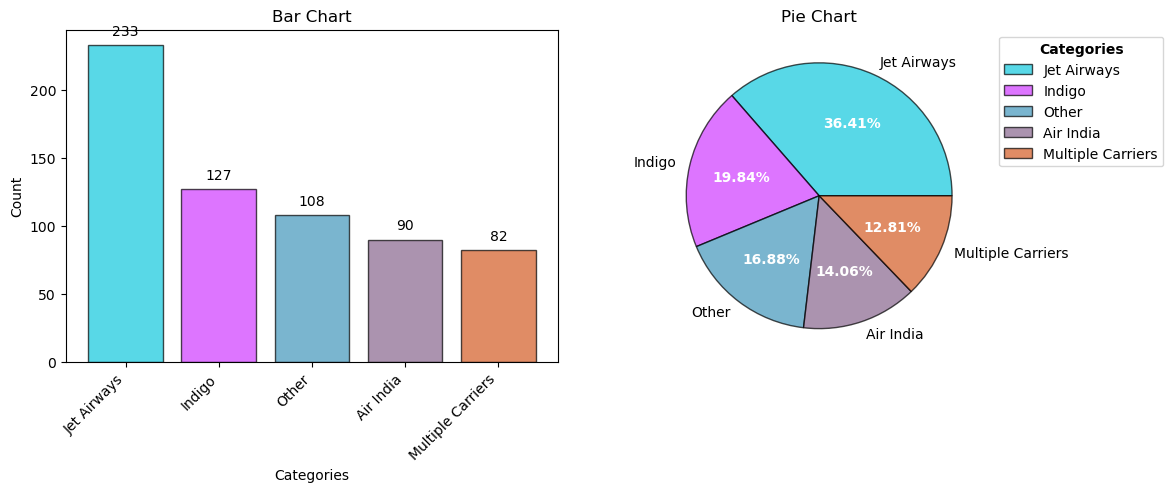

In [29]:
# eda_helper_functions.cat_univar_plots(train,'airline')
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False,k=4
                                     )

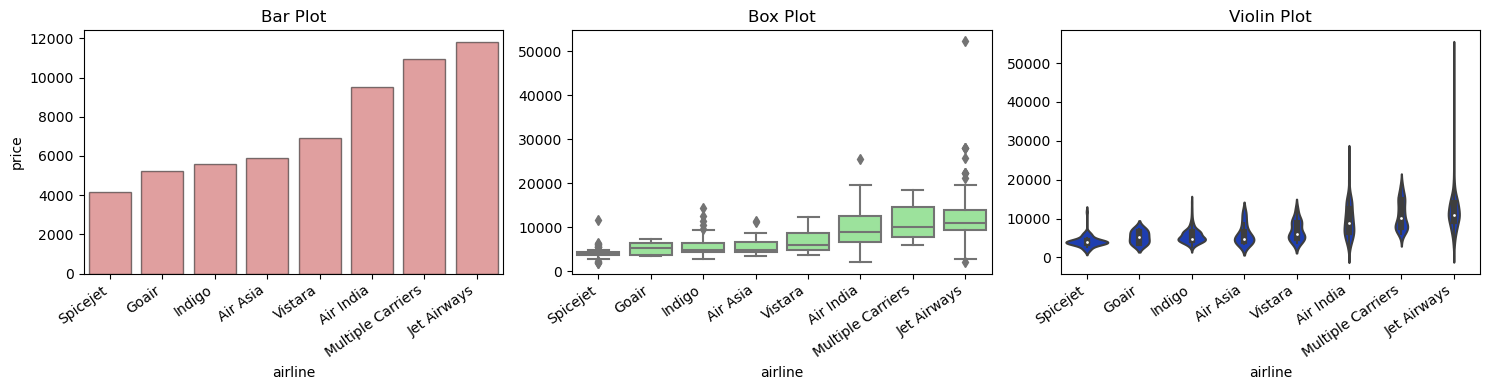

In [31]:
eda_helper_functions.num_cat_bivar_plots(train,'price','airline')

In [32]:
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 52.644412156851054
- p-value              : 4.088749250842917e-59
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 317.9049820939499
- p-value              : 9.041561854086474e-65
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


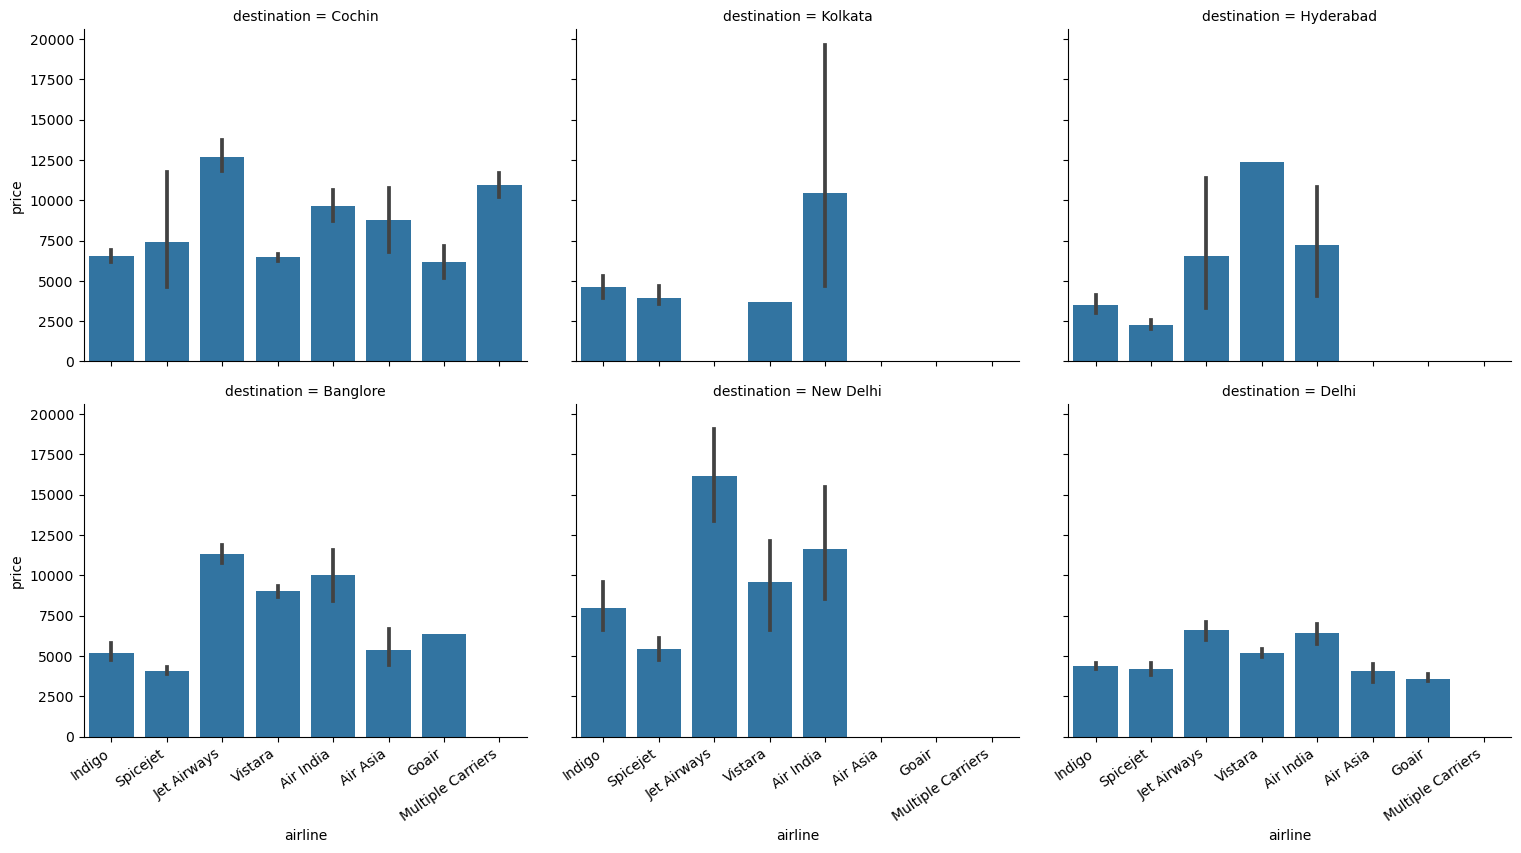

In [42]:
airline_grid = sns.FacetGrid(data=train,col='destination',sharey = True,col_wrap=3,height=4,aspect=1.3)

airline_grid.map(sns.barplot,'airline','price',order= train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)



### 8.2) Date of Journey

In [43]:
train.date_of_journey

0     2019-06-12
1     2019-03-01
2     2019-06-03
3     2019-06-03
4     2019-06-06
         ...    
635   2019-03-24
636   2019-03-24
637   2019-03-01
638   2019-03-24
639   2019-03-06
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

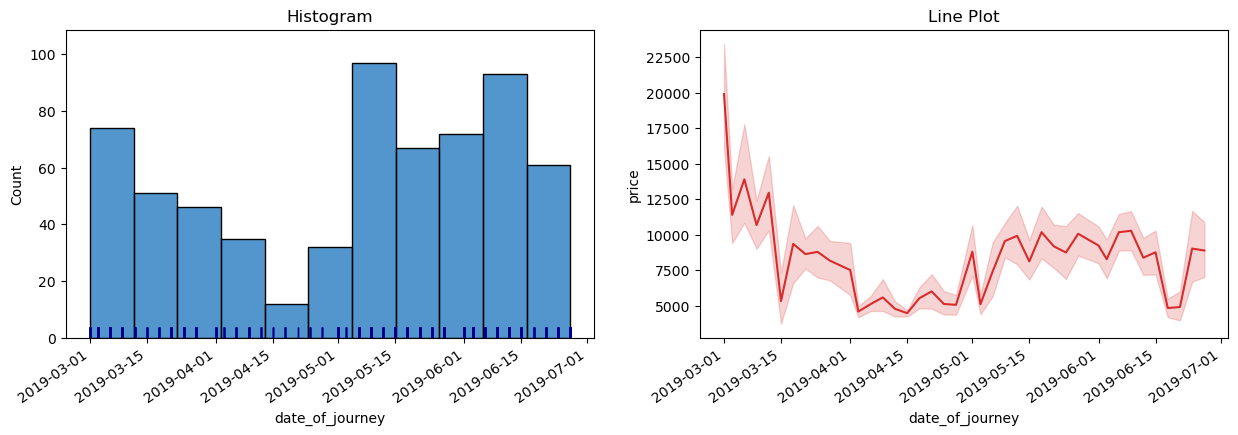

In [47]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

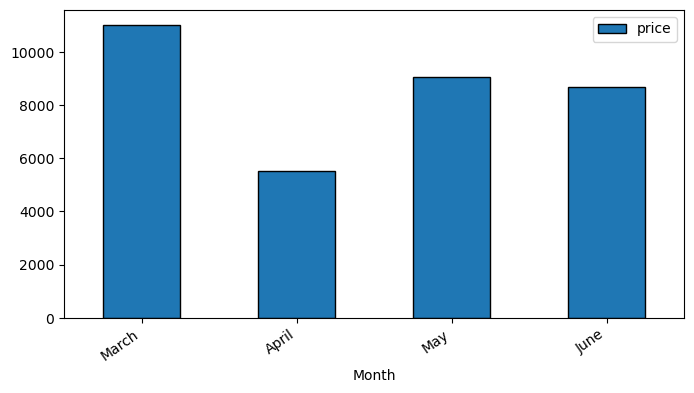

In [70]:
(
    train
    .groupby(pd.Grouper(key ='date_of_journey',freq = 'M'))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index='Month')
    .plot(
        figsize=(8,4),
        kind='bar',
        edgecolor = 'black'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

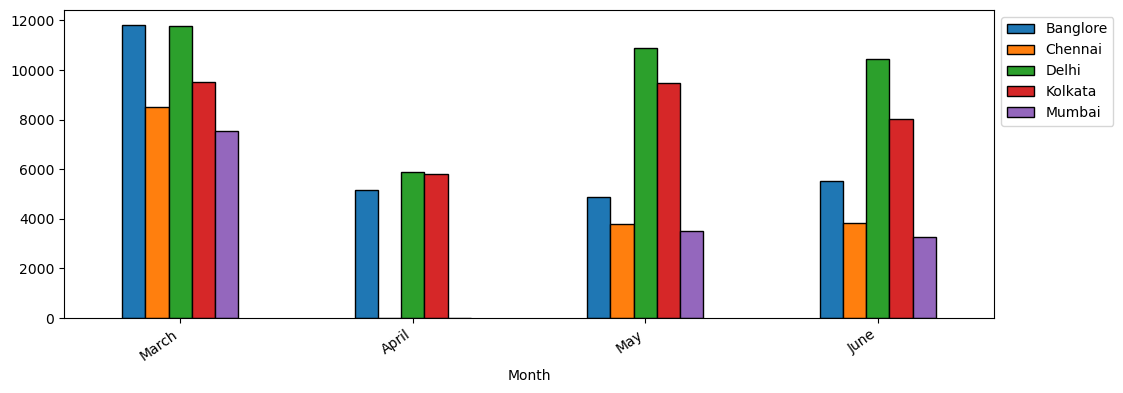

In [84]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey', freq='M'),'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index='Month')
    .plot(
        figsize=(12,4),
        kind='bar',
        edgecolor = 'black')
)
ax=plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3) Dep_time

In [85]:
train.dep_time

0     2024-07-26 16:00:00
1     2024-07-26 14:40:00
2     2024-07-26 05:45:00
3     2024-07-26 21:25:00
4     2024-07-26 20:25:00
              ...        
635   2024-07-26 05:45:00
636   2024-07-26 17:45:00
637   2024-07-26 08:50:00
638   2024-07-26 04:15:00
639   2024-07-26 05:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

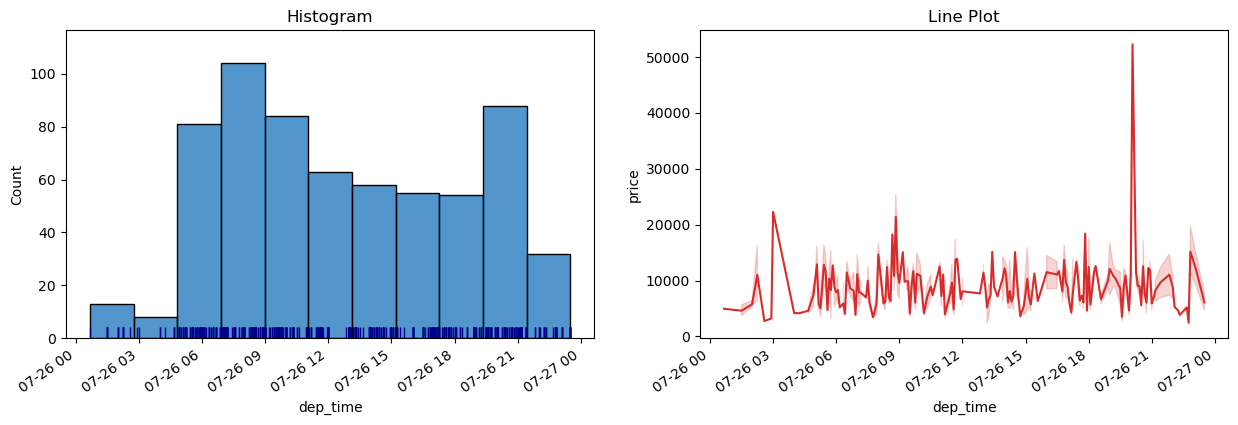

In [86]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

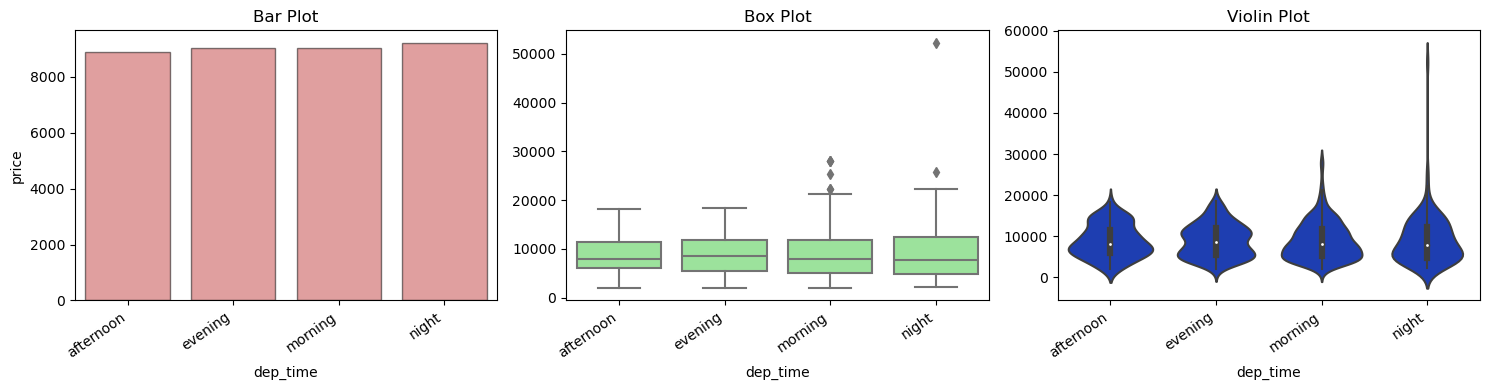

In [96]:
(
    train
    .assign(dep_time=lambda df_: (
           np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                      df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                      df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                      ['morning','afternoon','evening'],
                       default ='night' )))
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')
)


### 8.4) Duration

In [98]:
train.duration

0       300
1       145
2        90
3      1295
4       870
       ... 
635     300
636     140
637     905
638     335
639    2300
Name: duration, Length: 640, dtype: int64

In [99]:
eda_helper_functions.num_summary(train,'duration')

0       300
1       145
2        90
3      1295
4       870
       ... 
635     300
636     140
637     905
638     335
639    2300
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,135.00
10,150.00
25,170.00
50,500.00
75,911.25
90,1420.00
95,1550.00
99,1775.50


,value
mean,628.148438
trimmed mean (5%),595.269097
trimmed mean (10%),567.666016
median,500.000000


,value
var,244492.067134
std,494.461391
IQR,741.250000
mad,330.000000
coef_variance,0.787173


,value
skewness,0.905701
kurtosis,0.057410


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.4891307870324335e-21
Test Statistic       : 0.8831964731216431
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.330212372935193
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [126]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -941.875
Upper Limit : 2023.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
364,Air India,2019-05-21,Delhi,Cochin,2024-07-26 05:55:00,2024-07-26 19:15:00,2240,2.0,No Info,10493
102,Air India,2019-05-21,Delhi,Cochin,2024-07-26 05:00:00,2024-07-26 19:15:00,2295,2.0,No Info,9968
142,Air India,2019-03-06,Delhi,Cochin,2024-07-26 05:00:00,2024-07-26 19:15:00,2295,2.0,No Info,10283
639,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-26 05:25:00,2024-07-26 19:45:00,2300,2.0,In-flight meal not included,16389
583,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-26 10:20:00,2024-07-26 04:25:00,2525,2.0,No Info,11664


In [101]:
train.duration.quantile([0.25,0.5,0.75])

0.25    170.00
0.50    500.00
0.75    911.25
Name: duration, dtype: float64

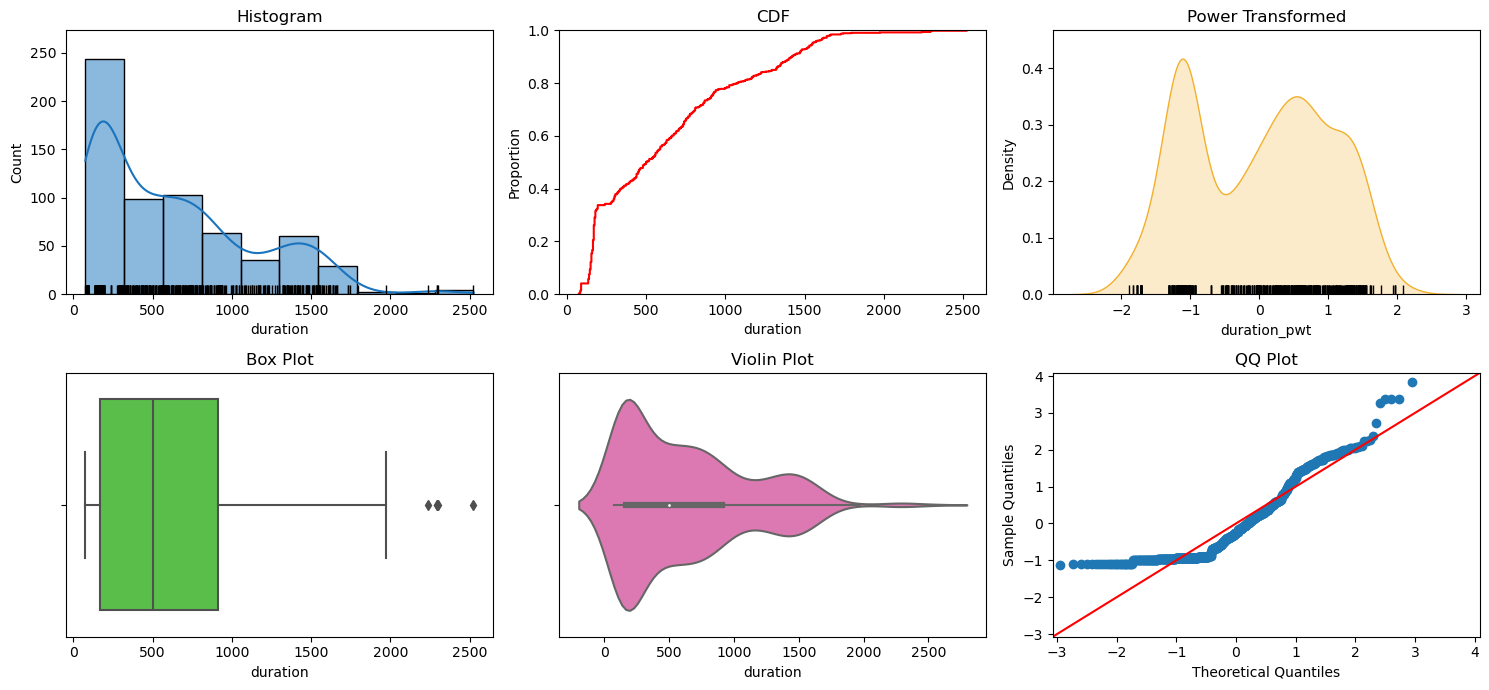

In [103]:
eda_helper_functions.num_univar_plots(train,'duration')

TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

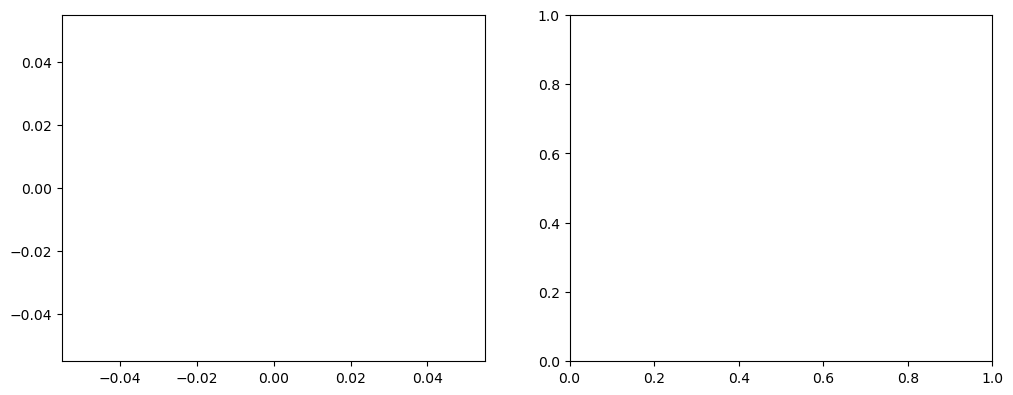

In [109]:
eda_helper_functions.num_bivar_plots(train,'duration','price')

In [111]:
eda_helper_functions.num_num_hyp_testing(train,'duration','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4765343708082663
- p-value              : 1.3583385002839727e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6927205087130982
- p-value              : 1.2588564238096564e-92
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


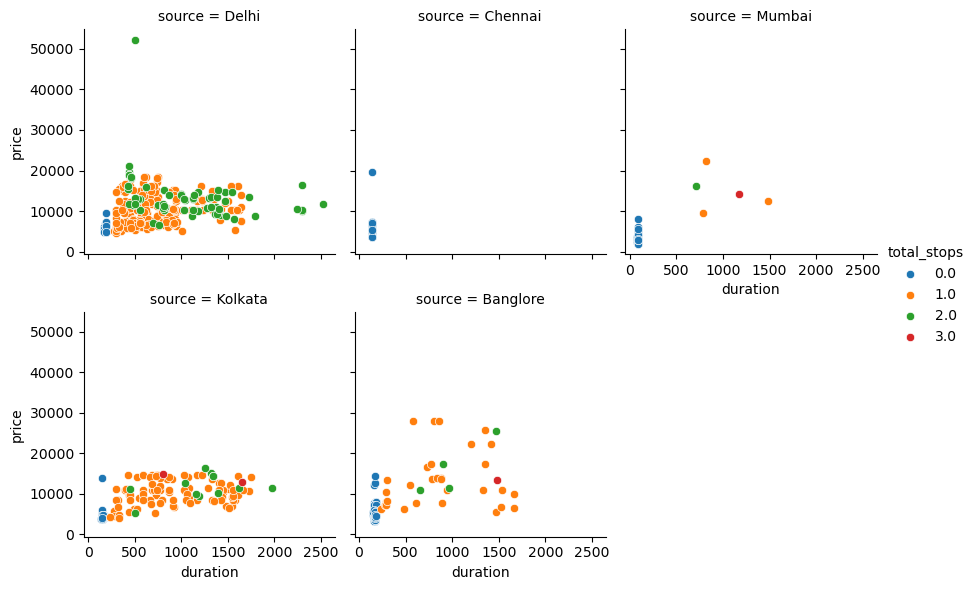

In [118]:
duration_grid = sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True,
    col_wrap=3
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

### 9.) Automated EDA (incase of large columns dataset)

In [120]:
pip install ydata_profiling

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/125.2 kB ? eta -:--:--
     --------- --------------------------- 30.7/125.2 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 281.8 kB/s eta 0:00:01
     ------------------------ ------------ 81.9/125.2 kB 512.0 kB/s eta 0:00:01
     -----------------------------------  122.9/125.2 kB 554.9 kB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 491.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/356.2 kB ? eta -:--:--
   ------ --------------------------------- 61.4/356.2 kB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 102.4/356.2 kB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 143.4/356.2 kB 1.1 MB/s eta 0:00:01
   ------------------------- ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.


In [121]:
from ydata_profiling import ProfileReport

In [124]:
report = ProfileReport(train)
report.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 8.5) Additional Info